In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Pizza.csv')
df.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [2]:
df_target = df['brand']
df.drop('brand', axis=1, inplace=True)

df.head()

,id,mois,prot,fat,ash,sodium,carb,cal
0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [3]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df)
df_scaled[:5]

array([[-0.97421164, -1.37181459,  1.25418127,  2.74984143,  1.9538938 ,
         2.97668662, -1.22751105,  2.68012924],
       [-0.97651337, -1.30156227,  1.22771661,  2.64047481,  2.13533826,
         3.03077869, -1.21362189,  2.53473344],
       [-0.98054139, -1.31624186,  1.03000998,  2.85139615,  1.93022714,
         2.59804213, -1.22584435,  2.71243942],
       [-0.98183611, -1.0855626 ,  1.05491791,  2.55565988,  1.70144935,
         2.54395006, -1.1936215 ,  2.37318255],
       [-0.98341855, -1.09185385,  1.2308301 ,  2.39049396,  1.72511601,
         2.62508816, -1.17250998,  2.26009693]])

In [4]:
features = df_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.00334448,  0.03270407, -0.07674126, -0.00487631, -0.03418551,
        -0.01520677,  0.0150162 , -0.02127955],
       [ 0.03270407,  1.00334448,  0.36145252, -0.17189118,  0.26644367,
        -0.10262097, -0.59378092, -0.7669972 ],
       [-0.07674126,  0.36145252,  1.00334448,  0.49966723,  0.82659903,
         0.43056473, -0.85639691,  0.07049308],
       [-0.00487631, -0.17189118,  0.49966723,  1.00334448,  0.79428157,
         0.93644671, -0.64237943,  0.76712418],
       [-0.03418551,  0.26644367,  0.82659903,  0.79428157,  1.00334448,
         0.8108249 , -0.90199502,  0.32756032]])

In [5]:
values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([4.18700019, 2.29816159, 1.01008238, 0.4084765 , 0.09510475])

In [6]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values, dtype=np.float64))
 
print(np.sum(explained_variances), '\n', explained_variances)

1.0 
 [0.5216304399548626, 0.28631263130129436, 0.12583942941561835, 0.050889363529557946, 0.011848467144535918, 0.0034362870133833813, 4.219300776644732e-05, 1.1886329810289436e-06]


In [26]:
projected_1 = df_scaled.dot(vectors.T[0])
projected_2 = df_scaled.dot(vectors.T[1])
projected_3 = df_scaled.dot(vectors.T[2])

result = pd.DataFrame(projected_1, columns=['PC1'])
result['PC2'] = projected_2
result['PC3'] = projected_2
result['Y'] = df_target
result.head()

,PC1,PC2,PC3,Y
0,-5.029003,-2.683866,-2.683866,A
1,-5.042441,-2.533955,-2.533955,A
2,-4.824210,-2.678397,-2.678397,A
3,-4.488378,-2.289807,-2.289807,A
4,-4.490815,-2.163979,-2.163979,A


In [33]:
print(np.sum(explained_variances))

1.0000000000000002


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


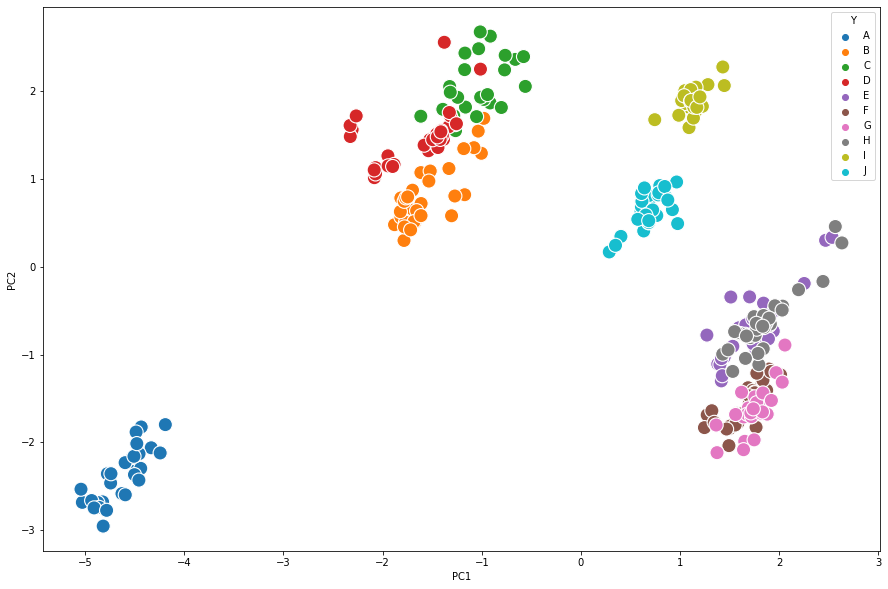

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s=200)

<Figure size 480x480 with 0 Axes>

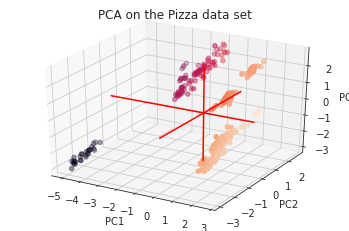

In [62]:
N=10

# libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as pltt
 
# Get the iris dataset
sns.set_style("white")

# create figure
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PC1'], result['PC2'], result['PC3'], c=result['PC1'])
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PC1']), max(result['PC1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PC2']), max(result['PC2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PC3']), max(result['PC3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the Pizza data set")
plt.show()